In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database
conn = sqlite3.connect('database.db')
cursor = conn.cursor()
cursor.execute('SELECT * FROM flight_data')
rows = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
df = pd.DataFrame(rows, columns=column_names)
conn.close()

print(df.head())


You should consider upgrading via the 'c:\users\tomas\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


   MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  DISTANCE_GROUP  SEGMENT_NUMBER  \
0      1            7          0    0800-0859               2               1   
1      1            7          0    0700-0759               7               1   
2      1            7          0    0600-0659               7               1   
3      1            7          0    0600-0659               9               1   
4      1            7          0    0001-0559               7               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS            CARRIER_NAME  \
0                  25              143  Southwest Airlines Co.   
1                  29              191    Delta Air Lines Inc.   
2                  27              199    Delta Air Lines Inc.   
3                  27              180    Delta Air Lines Inc.   
4                  10              182        Spirit Air Lines   

   AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE       DEPARTING_AIRPORT  LATITUDE  \
0                  13056  ...         

In [5]:
print(df.describe())

          MONTH    DAY_OF_WEEK      DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
count  500000.0  500000.000000  500000.000000   500000.000000   500000.000000   
mean        1.0       3.834422       0.175096        3.818570        2.910432   
std         0.0       1.918668       0.380050        2.367081        1.683011   
min         1.0       1.000000       0.000000        1.000000        1.000000   
25%         1.0       2.000000       0.000000        2.000000        2.000000   
50%         1.0       4.000000       0.000000        3.000000        3.000000   
75%         1.0       5.000000       0.000000        5.000000        4.000000   
max         1.0       7.000000       1.000000       11.000000       15.000000   

       CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
count       500000.000000    500000.000000          500000.000000   
mean            26.213624       133.797984           11904.561170   
std             19.657621        46.324844            7925.9558

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64


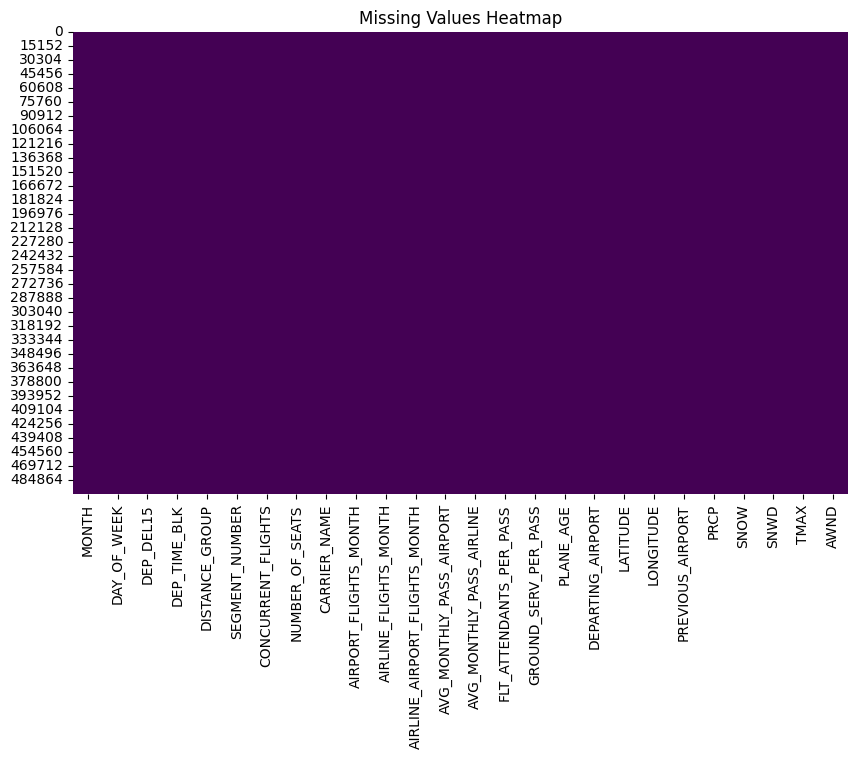

In [6]:
# Check for missing values
print(df.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [7]:
print(df.dtypes)


MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [8]:

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          500000 non-null  int64  
 1   DAY_OF_WEEK                    500000 non-null  int64  
 2   DEP_DEL15                      500000 non-null  int64  
 3   DEP_TIME_BLK                   500000 non-null  object 
 4   DISTANCE_GROUP                 500000 non-null  int64  
 5   SEGMENT_NUMBER                 500000 non-null  int64  
 6   CONCURRENT_FLIGHTS             500000 non-null  int64  
 7   NUMBER_OF_SEATS                500000 non-null  int64  
 8   CARRIER_NAME                   500000 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          500000 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          500000 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  500000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

In [9]:
from sklearn.preprocessing import LabelEncoder
#encoding



le = LabelEncoder()
df['CARRIER_NAME'] = le.fit_transform(df['CARRIER_NAME'])


label_mapping = pd.DataFrame({'Category': le.classes_, 'Encoded': le.transform(le.classes_)})
print(label_mapping)



                        Category  Encoded
0           Alaska Airlines Inc.        0
1                  Allegiant Air        1
2         American Airlines Inc.        2
3   American Eagle Airlines Inc.        3
4    Atlantic Southeast Airlines        4
5                    Comair Inc.        5
6           Delta Air Lines Inc.        6
7              Endeavor Air Inc.        7
8         Frontier Airlines Inc.        8
9         Hawaiian Airlines Inc.        9
10               JetBlue Airways       10
11            Mesa Airlines Inc.       11
12         Midwest Airline, Inc.       12
13         SkyWest Airlines Inc.       13
14        Southwest Airlines Co.       14
15              Spirit Air Lines       15
16         United Air Lines Inc.       16


In [10]:
from sklearn.preprocessing import LabelEncoder
#encoding



le = LabelEncoder()
df['DEPARTING_AIRPORT'] = le.fit_transform(df['DEPARTING_AIRPORT'])


label_mapping = pd.DataFrame({'Category': le.classes_, 'Encoded': le.transform(le.classes_)})
print(label_mapping)

                             Category  Encoded
0   Albuquerque International Sunport        0
1             Anchorage International        1
2                   Atlanta Municipal        2
3    Austin - Bergstrom International        3
4                  Birmingham Airport        4
..                                ...      ...
79               Tucson International       79
80                Tulsa International       80
81    Washington Dulles International       81
82                  Will Rogers World       82
83                    William P Hobby       83

[84 rows x 2 columns]


In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          500000 non-null  int64  
 1   DAY_OF_WEEK                    500000 non-null  int64  
 2   DEP_DEL15                      500000 non-null  int64  
 3   DEP_TIME_BLK                   500000 non-null  object 
 4   DISTANCE_GROUP                 500000 non-null  int64  
 5   SEGMENT_NUMBER                 500000 non-null  int64  
 6   CONCURRENT_FLIGHTS             500000 non-null  int64  
 7   NUMBER_OF_SEATS                500000 non-null  int64  
 8   CARRIER_NAME                   500000 non-null  int64  
 9   AIRPORT_FLIGHTS_MONTH          500000 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          500000 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  500000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

In [12]:
import numpy as np
df['month_sin'] = np.sin(2 * np.pi * df['MONTH']/12)
df['month_cos'] = np.cos(2 * np.pi * df['MONTH']/12)


In [13]:
stats = df.describe().transpose()
print(stats)

                                  count          mean           std  \
MONTH                          500000.0  1.000000e+00  0.000000e+00   
DAY_OF_WEEK                    500000.0  3.834422e+00  1.918668e+00   
DEP_DEL15                      500000.0  1.750960e-01  3.800496e-01   
DISTANCE_GROUP                 500000.0  3.818570e+00  2.367081e+00   
SEGMENT_NUMBER                 500000.0  2.910432e+00  1.683011e+00   
CONCURRENT_FLIGHTS             500000.0  2.621362e+01  1.965762e+01   
NUMBER_OF_SEATS                500000.0  1.337980e+02  4.632484e+01   
CARRIER_NAME                   500000.0  9.103744e+00  5.153345e+00   
AIRPORT_FLIGHTS_MONTH          500000.0  1.190456e+04  7.925956e+03   
AIRLINE_FLIGHTS_MONTH          500000.0  5.959332e+04  3.307166e+04   
AIRLINE_AIRPORT_FLIGHTS_MONTH  500000.0  3.251507e+03  3.910634e+03   
AVG_MONTHLY_PASS_AIRPORT       500000.0  1.604790e+06  1.111904e+06   
AVG_MONTHLY_PASS_AIRLINE       500000.0  7.882752e+06  5.056192e+06   
FLT_AT

In [14]:
#discriptive stats
desc_stats = df.describe().transpose()



# Display the table
print(desc_stats)


                                  count          mean           std  \
MONTH                          500000.0  1.000000e+00  0.000000e+00   
DAY_OF_WEEK                    500000.0  3.834422e+00  1.918668e+00   
DEP_DEL15                      500000.0  1.750960e-01  3.800496e-01   
DISTANCE_GROUP                 500000.0  3.818570e+00  2.367081e+00   
SEGMENT_NUMBER                 500000.0  2.910432e+00  1.683011e+00   
CONCURRENT_FLIGHTS             500000.0  2.621362e+01  1.965762e+01   
NUMBER_OF_SEATS                500000.0  1.337980e+02  4.632484e+01   
CARRIER_NAME                   500000.0  9.103744e+00  5.153345e+00   
AIRPORT_FLIGHTS_MONTH          500000.0  1.190456e+04  7.925956e+03   
AIRLINE_FLIGHTS_MONTH          500000.0  5.959332e+04  3.307166e+04   
AIRLINE_AIRPORT_FLIGHTS_MONTH  500000.0  3.251507e+03  3.910634e+03   
AVG_MONTHLY_PASS_AIRPORT       500000.0  1.604790e+06  1.111904e+06   
AVG_MONTHLY_PASS_AIRLINE       500000.0  7.882752e+06  5.056192e+06   
FLT_AT

In [15]:
desc_stats = df.describe().transpose()

# Display as a table (formatted output)
from IPython.display import display  # Works in Jupyter Notebooks
display(desc_stats)


,count,mean,std,min,25%,50%,75%,max
MONTH,500000.0,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
DAY_OF_WEEK,500000.0,3.834422e+00,1.918668e+00,1.000000,2.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00
DEP_DEL15,500000.0,1.750960e-01,3.800496e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
DISTANCE_GROUP,500000.0,3.818570e+00,2.367081e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01
SEGMENT_NUMBER,500000.0,2.910432e+00,1.683011e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.500000e+01
CONCURRENT_FLIGHTS,500000.0,2.621362e+01,1.965762e+01,1.000000,1.100000e+01,2.200000e+01,3.600000e+01,9.300000e+01
NUMBER_OF_SEATS,500000.0,1.337980e+02,4.632484e+01,44.000000,9.000000e+01,1.430000e+02,1.720000e+02,3.370000e+02
CARRIER_NAME,500000.0,9.103744e+00,5.153345e+00,0.000000,5.000000e+00,1.000000e+01,1.400000e+01,1.600000e+01
AIRPORT_FLIGHTS_MONTH,500000.0,1.190456e+04,7.925956e+03,1134.000000,4.925000e+03,1.072800e+04,1.772500e+04,3.084200e+04
AIRLINE_FLIGHTS_MONTH,500000.0,5.959332e+04,3.307166e+04,6713.000000,2.346300e+04,6.210500e+04,7.550600e+04,1.073630e+05


In [19]:
df['DEP_DEL15'] = df['DEP_DEL15'].astype('category')
categorical_data = df.select_dtypes(include=['object', 'category'])  # Select columns with categorical (object) type

# Generate descriptive statistics for categorical variables
cat_stats = categorical_data.describe().transpose()  # Transpose for better readability

# Display the table
from IPython.display import display  # Use display for Jupyter or Colab
display(cat_stats)



,count,unique,top,freq
DEP_DEL15,500000,2,0,412452
DEP_TIME_BLK,500000,19,0800-0859,35675
PREVIOUS_AIRPORT,500000,336,NONE,119995


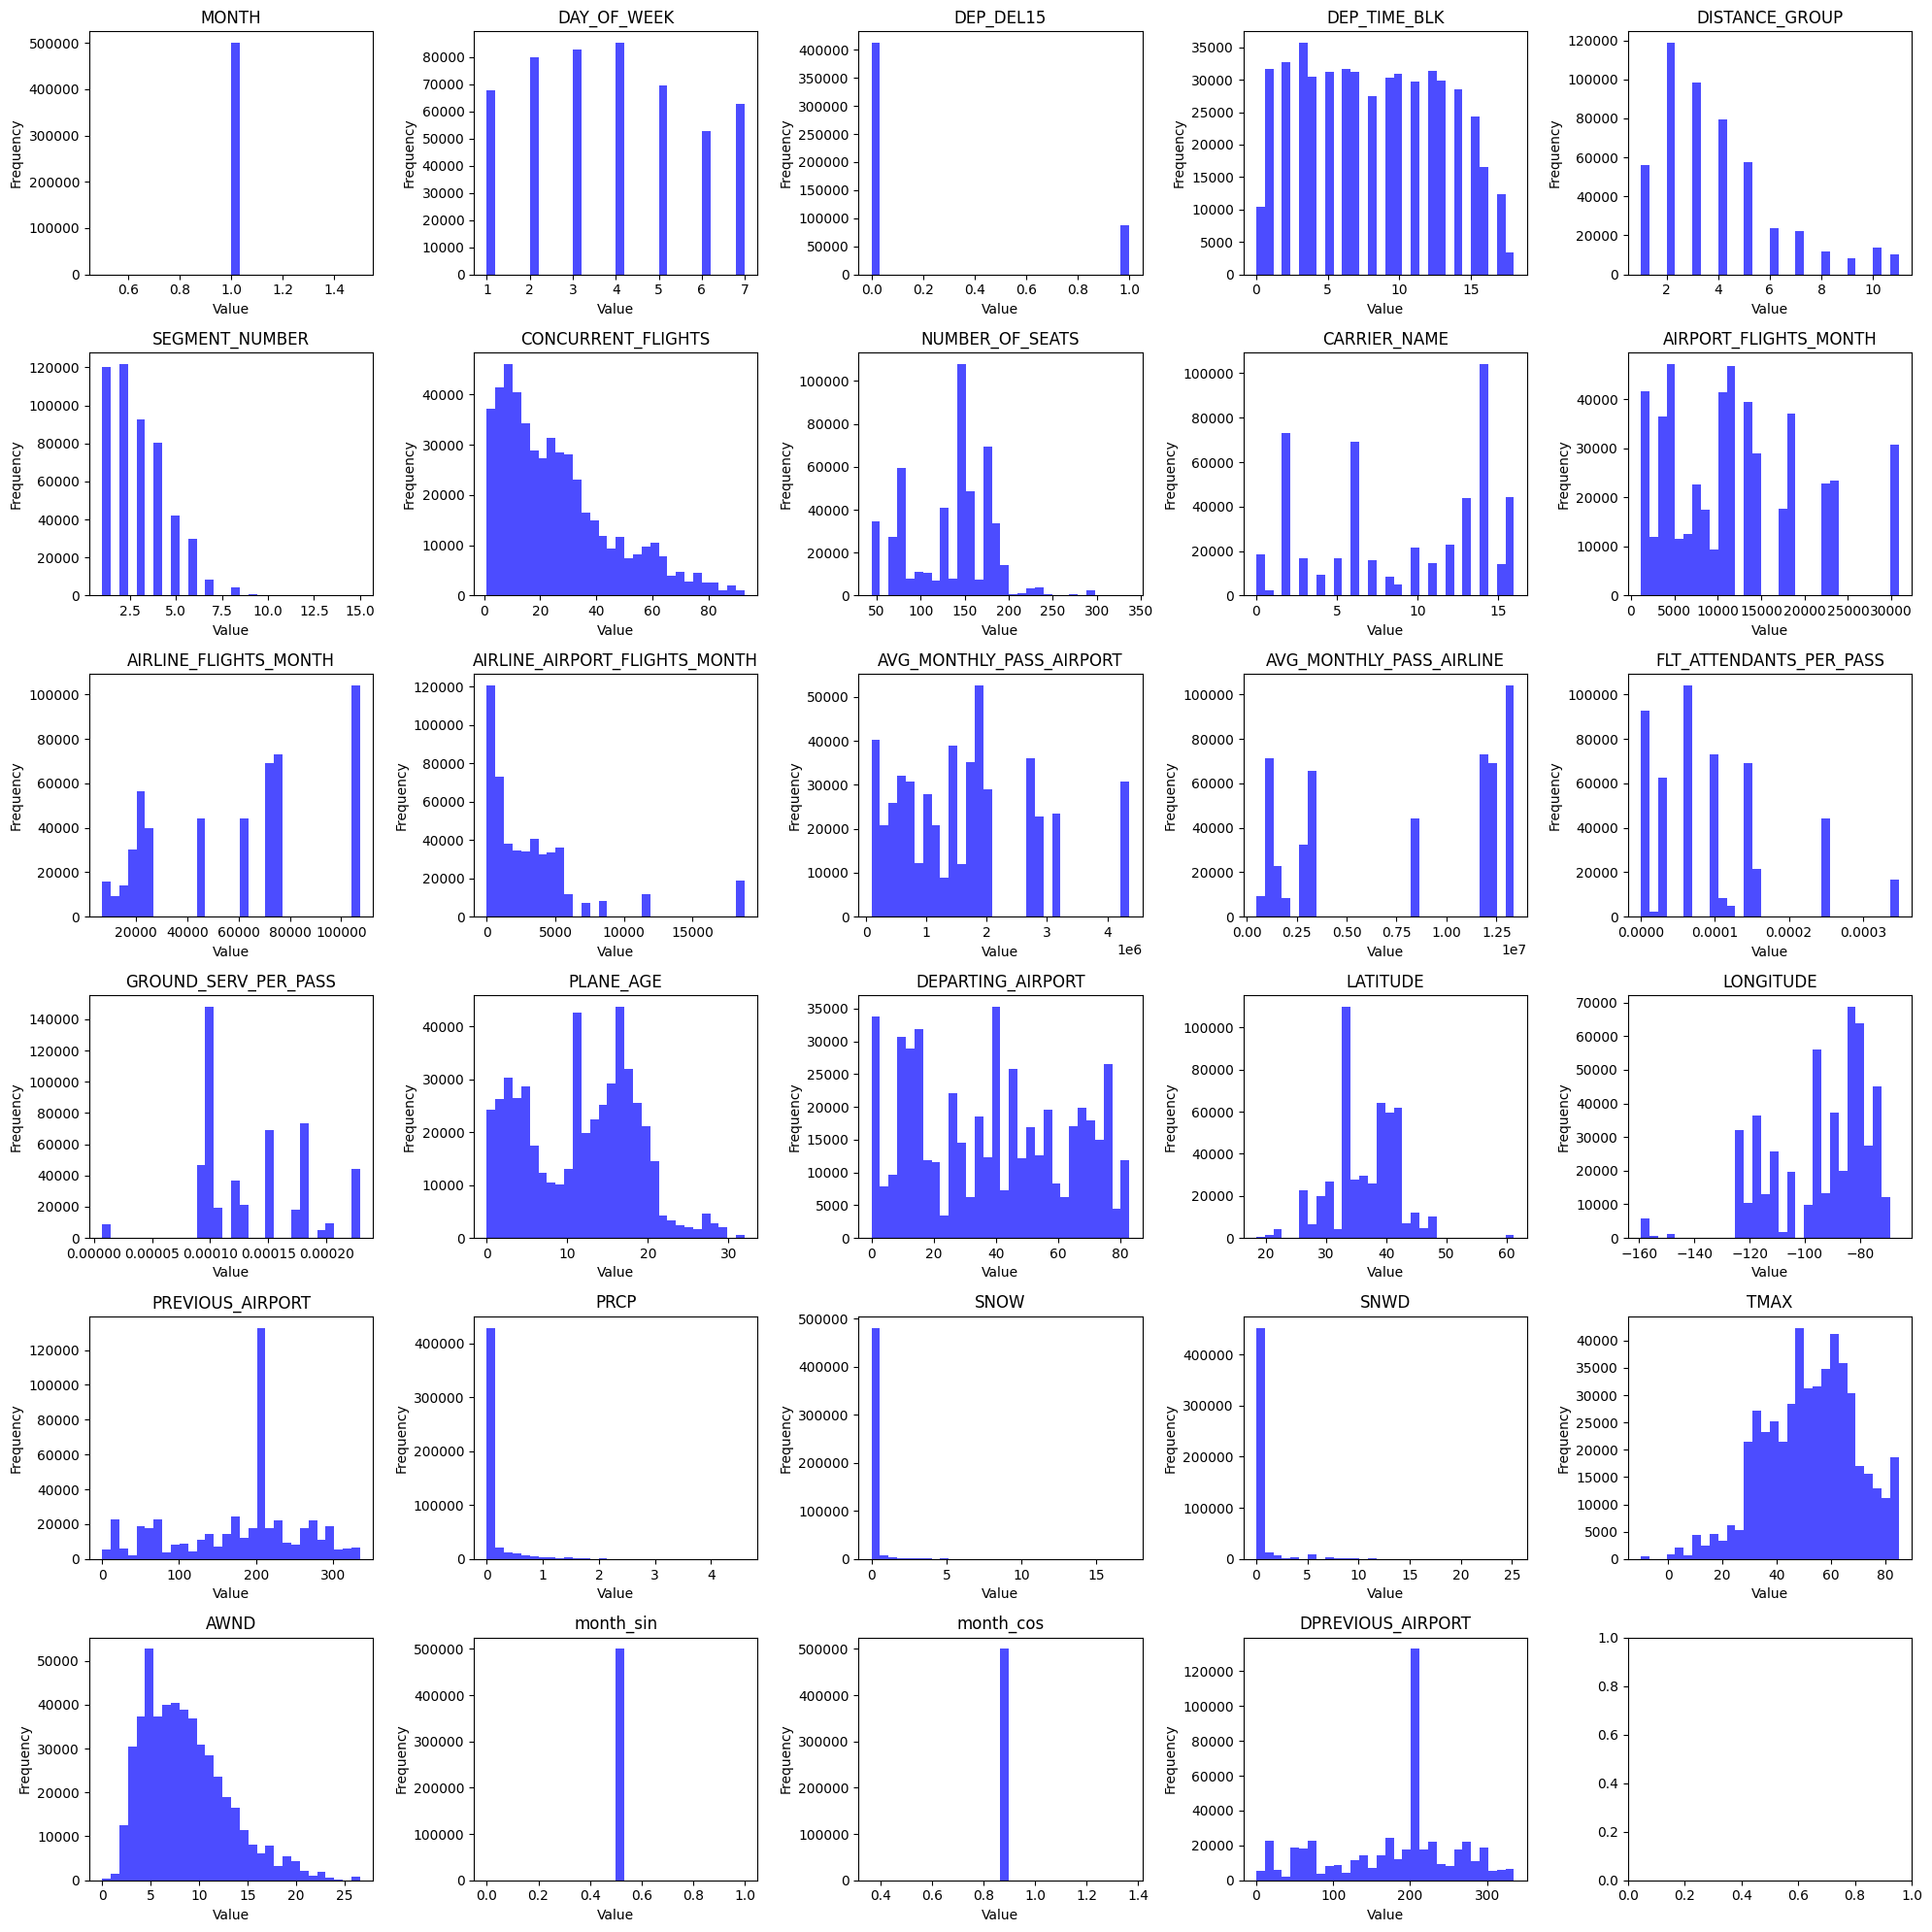

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# Set up the plot grid
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))  # Adjust grid size based on number of columns
axes = axes.flatten()  # Flatten the grid for easier indexing

# Plot histograms for all columns
for i, col in enumerate(df.columns):
    if df[col].dtype in ['int64', 'float64']:  # Include only numerical columns
        axes[i].hist(df[col], bins=30, color='blue', alpha=0.7)
        axes[i].set_title(col)  # Set title as column name
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


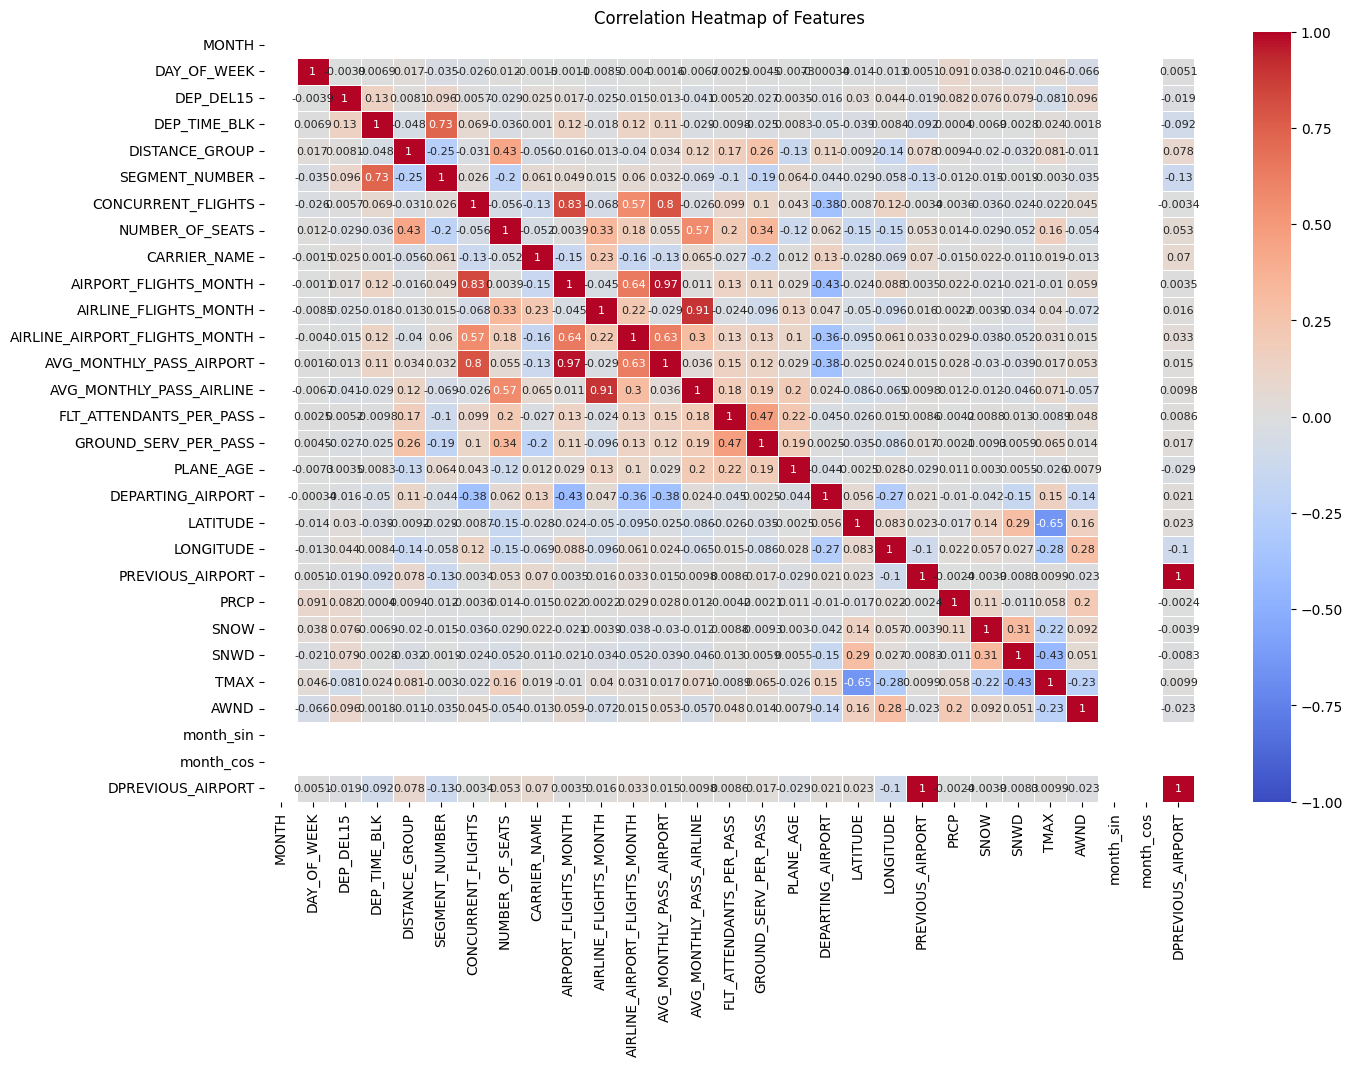

In [34]:
le = LabelEncoder()
df['DEP_TIME_BLK'] = le.fit_transform(df['DEP_TIME_BLK'])
le = LabelEncoder()
df['DEPARTING_AIRPORT'] = le.fit_transform(df['DEPARTING_AIRPORT'])

# Compute the correlation matrix
corr = df.corr()

# Adjust the figure size and font size for annotations
plt.figure(figsize=(15, 10))  # Adjust the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Heatmap of Features')
plt.show()


In [25]:
print(df.dtypes)


MONTH                              int64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                       int64
DISTANCE_GROUP                     int64
SEGMENT_NUMBER                     int64
CONCURRENT_FLIGHTS                 int64
NUMBER_OF_SEATS                    int64
CARRIER_NAME                       int64
AIRPORT_FLIGHTS_MONTH              int64
AIRLINE_FLIGHTS_MONTH              int64
AIRLINE_AIRPORT_FLIGHTS_MONTH      int64
AVG_MONTHLY_PASS_AIRPORT           int64
AVG_MONTHLY_PASS_AIRLINE           int64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                          int64
DEPARTING_AIRPORT                  int64
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                   int64
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX            

In [26]:
df['DEP_DEL15'] = df['DEP_DEL15'].astype('int64')
e = LabelEncoder()
df['PREVIOUS_AIRPORT'] = le.fit_transform(df['PREVIOUS_AIRPORT'])
df['DPREVIOUS_AIRPORT'] = df['PREVIOUS_AIRPORT'].astype('int64')

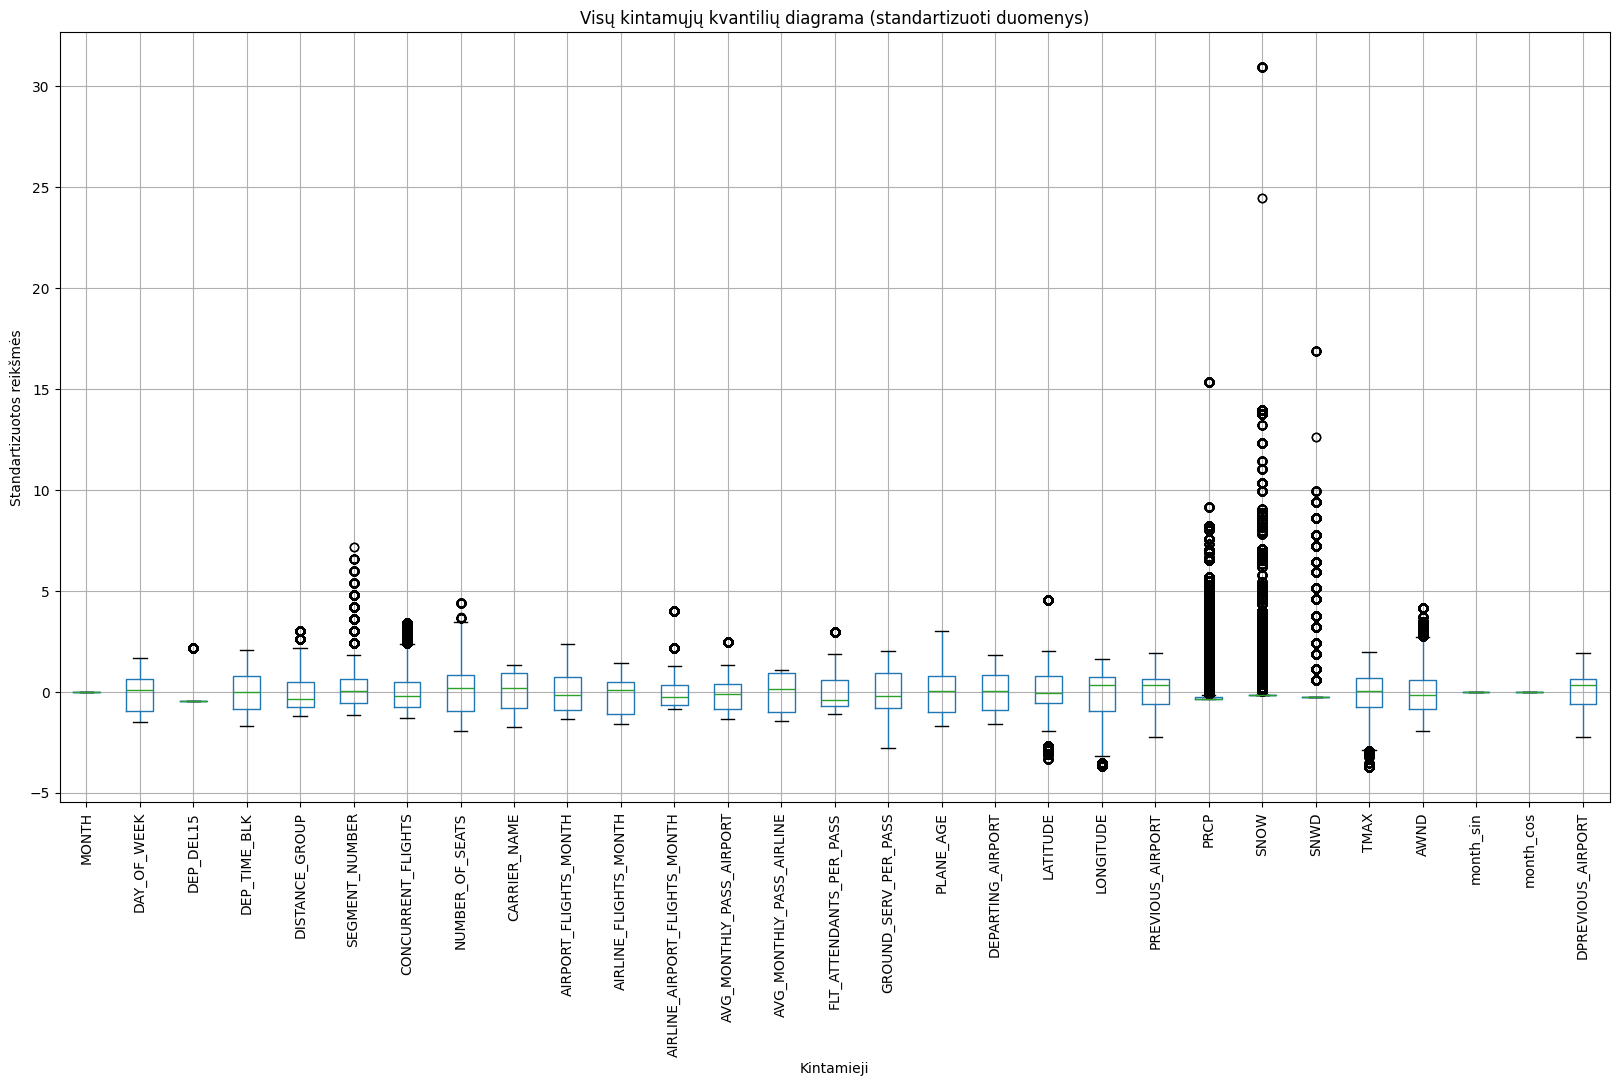

In [36]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

# Create boxplot for scaled data
plt.figure(figsize=(20, 10))
numerical_data_scaled.boxplot(rot=90)
plt.title('Visų kintamųjų kvantilių diagrama (standartizuoti duomenys)')
plt.ylabel('Standartizuotos reikšmės')
plt.xlabel('Kintamieji')
plt.grid(True)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Define the parameter grid
param_grid = {
    'n_estimators': [250],              # Number of trees
    'max_features': [6, 2, 3],          # max_features: small, basic, large
    'class_weight': ['balanced'],       # Handle class imbalance
    'oob_score': [True]               # Enable out-of-bag score
                  
}


# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',           # Use ROC-AUC as the evaluation metric                      # Use StratifiedKFold
    n_jobs=1,                   # Parallelize across all available CPUs
    verbose=2                    # Print progress during grid search
)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Train the best model on the full training data
best_rf_model.fit(X_train, y_train)
# Evaluate on the training set (if needed)
train_predictions = best_rf_model.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_predictions)
print(f"Training ROC-AUC Score: {train_roc_auc}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END class_weight=balanced, max_features=6, n_estimators=250, oob_score=True; total time= 2.8min
[CV] END class_weight=balanced, max_features=6, n_estimators=250, oob_score=True; total time= 2.8min
[CV] END class_weight=balanced, max_features=6, n_estimators=250, oob_score=True; total time= 2.8min
[CV] END class_weight=balanced, max_features=6, n_estimators=250, oob_score=True; total time= 2.8min
[CV] END class_weight=balanced, max_features=6, n_estimators=250, oob_score=True; total time= 2.9min
[CV] END class_weight=balanced, max_features=2, n_estimators=250, oob_score=True; total time= 1.5min
[CV] END class_weight=balanced, max_features=2, n_estimators=250, oob_score=True; total time= 1.5min
[CV] END class_weight=balanced, max_features=2, n_estimators=250, oob_score=True; total time= 1.5min
[CV] END class_weight=balanced, max_features=2, n_estimators=250, oob_score=True; total time= 1.5min
[CV] END class_weight=balanced,

In [42]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

# Predict probabilities and class labels for the test set
test_predictions_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
test_predictions = best_rf_model.predict(X_test)  # Predicted class labels

# Calculate metrics for the test data
test_roc_auc = roc_auc_score(y_test, test_predictions_proba)  # ROC-AUC Score
test_f1 = f1_score(y_test, test_predictions)  # F1 Score
test_conf_matrix = confusion_matrix(y_test, test_predictions)  # Confusion Matrix

# Print the results
print(f"Test ROC-AUC Score: {test_roc_auc}")
print(f"Test F1 Score: {test_f1}")
print("Test Confusion Matrix:")
print(test_conf_matrix)

# Detailed classification report
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))

Test ROC-AUC Score: 0.7348131470984932
Test F1 Score: 0.2880849067667409
Test Confusion Matrix:
[[120805   2998]
 [ 21284   4913]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91    123803
           1       0.62      0.19      0.29     26197

    accuracy                           0.84    150000
   macro avg       0.74      0.58      0.60    150000
weighted avg       0.81      0.84      0.80    150000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Define the parameter grid
param_grid = {
    'n_estimators': [250],              # Number of trees
    'max_features': [6, 2, 3],          # max_features: small, basic, large
    'class_weight': ['balanced'],       # Handle class imbalance
    'oob_score': [True]               # Enable out-of-bag score
                  
}


# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',           # Use ROC-AUC as the evaluation metric                      # Use StratifiedKFold
    n_jobs=-1,                   # Parallelize across all available CPUs
    verbose=2                    # Print progress during grid search
)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Train the best model on the full training data
best_rf_model.fit(X_train, y_train)
# Evaluate on the training set (if needed)
train_predictions = best_rf_model.predict_proba(X_train)[:, 1]
train_roc_auc = roc_auc_score(y_train, train_predictions)
print(f"Training ROC-AUC Score: {train_roc_auc}")

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

# Predict probabilities and class labels for the test set
test_predictions_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
test_predictions = best_rf_model.predict(X_test)  # Predicted class labels

# Calculate metrics for the test data
test_roc_auc = roc_auc_score(y_test, test_predictions_proba)  # ROC-AUC Score
test_f1 = f1_score(y_test, test_predictions)  # F1 Score
test_conf_matrix = confusion_matrix(y_test, test_predictions)  # Confusion Matrix

# Print the results
print(f"Test ROC-AUC Score: {test_roc_auc}")
print(f"Test F1 Score: {test_f1}")
print("Test Confusion Matrix:")
print(test_conf_matrix)

# Detailed classification report
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid for the Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],        # Splitting criteria
    'max_depth': [None, 5, 10],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5],           # Minimum samples in a leaf node
}


# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='roc_auc',
    n_jobs=1
    verbose=2           # Print progress during the search
)

# Perform the grid search
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best ROC-AUC Score (Cross-Validation):", grid_search_dt.best_score_)

# Retrieve the best model
best_dt_model = grid_search_dt.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   3.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   4.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   3.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   3.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   3.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   3.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   3.9s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   3.9s
[CV] END criterion=gini, max_

In [ ]:
# Predict on the test data
test_predictions_dt = best_dt_model.predict(X_test)  # Class predictions
test_probabilities_dt = best_dt_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class (1)

# Calculate metrics for the test data
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

# ROC-AUC score
test_roc_auc_dt = roc_auc_score(y_test, test_probabilities_dt)
print(f"Test ROC-AUC Score: {test_roc_auc_dt}")

# F1 score
test_f1_dt = f1_score(y_test, test_predictions_dt)
print(f"Test F1 Score: {test_f1_dt}")

# Confusion Matrix
test_conf_matrix_dt = confusion_matrix(y_test, test_predictions_dt)
print("Test Confusion Matrix:")
print(test_conf_matrix_dt)

# Classification Report
print("Test Classification Report:")
print(classification_report(y_test, test_predictions_dt))

Test ROC-AUC Score: 0.6871429386651481
Test F1 Score: 0.37508879943168366
Test Confusion Matrix:
[[84811 38992]
 [11149 15048]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77    123803
           1       0.28      0.57      0.38     26197

    accuracy                           0.67    150000
   macro avg       0.58      0.63      0.57    150000
weighted avg       0.78      0.67      0.70    150000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid for the Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],        # Splitting criteria
    'max_depth': [None, 5, 10],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5],           # Minimum samples in a leaf node
}


# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='roc_auc',
    n_jobs=-1
    verbose=2           # Print progress during the search
)

# Perform the grid search
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best ROC-AUC Score (Cross-Validation):", grid_search_dt.best_score_)

# Retrieve the best model
best_dt_model = grid_search_dt.best_estimator_

In [ ]:
# Predict on the test data
test_predictions_dt = best_dt_model.predict(X_test)  # Class predictions
test_probabilities_dt = best_dt_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class (1)

# Calculate metrics for the test data
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

# ROC-AUC score
test_roc_auc_dt = roc_auc_score(y_test, test_probabilities_dt)
print(f"Test ROC-AUC Score: {test_roc_auc_dt}")

# F1 score
test_f1_dt = f1_score(y_test, test_predictions_dt)
print(f"Test F1 Score: {test_f1_dt}")

# Confusion Matrix
test_conf_matrix_dt = confusion_matrix(y_test, test_predictions_dt)
print("Test Confusion Matrix:")
print(test_conf_matrix_dt)

# Classification Report
print("Test Classification Report:")
print(classification_report(y_test, test_predictions_dt))

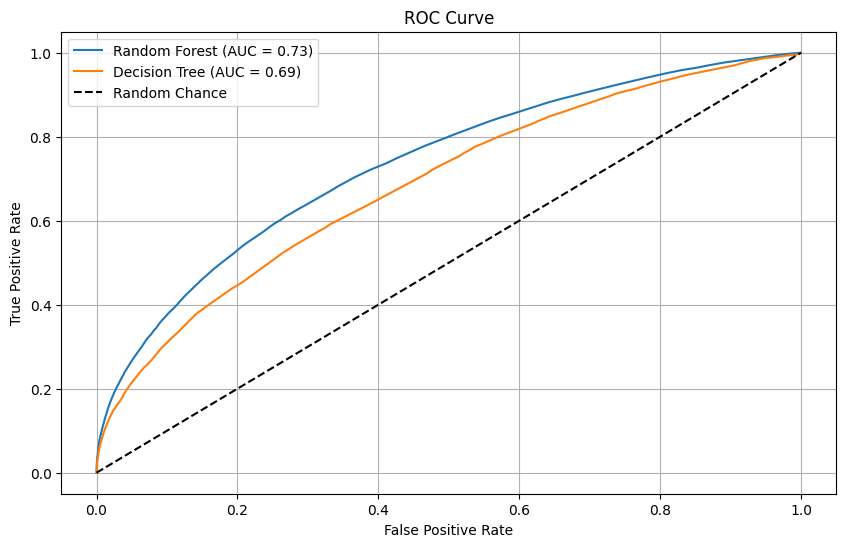

In [46]:
# Calculate the ROC curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, test_probabilities_dt)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {test_roc_auc:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {test_roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()